## Exploring NYC School Performance on Statewide English and Mathematics Exams

In [61]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import pylab as pl
import choroplethNYC as cp

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
#load english and math scores and school locations from nyc open data 
math = pd.read_csv("https://data.cityofnewyork.us/api/views/gcvr-n8qw/rows.csv?accessType=DOWNLOAD")

In [4]:
english = pd.read_csv("https://data.cityofnewyork.us/api/views/jk35-yh5p/rows.csv?accessType=DOWNLOAD")


In [5]:
loc = pd.read_csv("https://data.cityofnewyork.us/api/views/ac4n-c5re/rows.csv?accessType=DOWNLOAD")

In [6]:
#examine the dataframes
print(math.shape)
print(english.shape)
print(loc.shape)

(161403, 17)
(161412, 17)
(1819, 39)


In [7]:
english.columns

Index(['DBN', 'School Name', 'Grade', 'Year', 'Category', 'Number Tested',
       'Mean Scale Score', '# Level 1', '% Level 1', '# Level 2', '% Level 2',
       '# Level 3', '% Level 3', '# Level 4', '% Level 4', '# Level 3+4',
       '% Level 3+4'],
      dtype='object')

In [8]:
math.columns

Index(['DBN', 'School Name', 'Grade', 'Year', 'Category', 'Number Tested',
       'Mean Scale Score', '# Level 1', '% Level 1', '# Level 2', '% Level 2',
       '# Level 3', '% Level 3', '# Level 4', '% Level 4', '# Level 3+4',
       '% Level 3+4'],
      dtype='object')

In [9]:
loc.columns

Index(['FISCAL_YEAR', 'ATS SYSTEM CODE', 'LOCATION_CODE', 'LOCATION_NAME',
       'BEDS NUMBER', 'MANAGED_BY_NAME', 'LOCATION_TYPE_DESCRIPTION',
       'LOCATION_CATEGORY_DESCRIPTION', 'GRADES_TEXT', 'GRADES_FINAL_TEXT',
       'OPEN_DATE', 'STATUS_DESCRIPTIONS', 'PRIMARY_BUILDING_CODE',
       'PRIMARY_ADDRESS_LINE_1', 'STATE_CODE', 'X_COORDINATE', 'Y_COORDINATE',
       'COMMUNITY_DISTRICT', 'COUNCIL_DISTRICT', 'CENSUS_TRACT',
       'BOROUGH_BLOCK_LOT', 'NTA', 'NTA_NAME', 'PRINCIPAL_NAME',
       'PRINCIPAL_TITLE', 'PRINCIPAL_PHONE_NUMBER', 'FAX_NUMBER',
       'GEOGRAPHICAL_DISTRICT_CODE', 'ADMIN_DISTRICT_LOCATION_CODE',
       'ADMINISTRATIVE_DISTRICT_NAME', 'COMMUNITY_SCHOOL_SUP_NAME',
       'FIELD_SUPPORT_CENTER_NAME', 'FIELD_SUPPORT_CENTER_LEADER_NAME',
       'SCHOOL_SUPPORT_TEAM_NAME', 'SCHOOL_SUPPORT_TEAM_LEADER_NAME',
       'HIGHSCHOOL_NETWORK_LOCATION_CODE', 'HIGHSCHOOL_NETWORK_NAME',
       'HIGHSCHOOL_NETWORK_SUPERINTENDENT', 'Location 1'],
      dtype='object')

In [10]:
english.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2013,All Students,27,289,14,51.9,11,40.7,2,7.4,0,0,2,7.4
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,285,10,55.6,8,44.4,0,0,0,0,0,0
2,01M015,P.S. 015 ROBERTO CLEMENTE,3,2015,All Students,16,282,9,56.3,5,31.3,2,12.5,0,0,2,12.5
3,01M015,P.S. 015 ROBERTO CLEMENTE,4,2013,All Students,20,278,8,40,11,55,1,5,0,0,1,5
4,01M015,P.S. 015 ROBERTO CLEMENTE,4,2014,All Students,24,284,13,54.2,10,41.7,1,4.2,0,0,1,4.2


In [11]:
loc.head()

,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,OPEN_DATE,STATUS_DESCRIPTIONS,PRIMARY_BUILDING_CODE,PRIMARY_ADDRESS_LINE_1,STATE_CODE,X_COORDINATE,Y_COORDINATE,COMMUNITY_DISTRICT,COUNCIL_DISTRICT,CENSUS_TRACT,BOROUGH_BLOCK_LOT,NTA,NTA_NAME,PRINCIPAL_NAME,PRINCIPAL_TITLE,PRINCIPAL_PHONE_NUMBER,FAX_NUMBER,GEOGRAPHICAL_DISTRICT_CODE,ADMIN_DISTRICT_LOCATION_CODE,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1
0,2014,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72..."
1,2014,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1956 12:00:00 AM,Open,M019,185 1 AVENUE,NY,988547.0,205239.0,103,2,4000,1004530034,MN22,East Village ...,JACQUELINE FLANAGAN,PRINCIPAL,212-533-5340,212-673-1477,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"185 1 AVENUE\nMANHATTAN, NY 10003\n(40.730009,..."
2,2014,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1963 12:00:00 AM,Open,M020,166 ESSEX STREET,NY,988044.0,202068.0,103,1,3001,1003550001,MN27,Chinatown ...,JAMES LEE,PRINCIPAL,212-254-9577,212-254-3526,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"166 ESSEX STREET\nMANHATTAN, NY 10002\n(40.721..."
3,2014,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE","PK,0K,01,02,03,04,05,06,07,08",07/01/1955 12:00:00 AM,Open,M034,730 EAST 12 STREET,NY,991163.0,203782.0,103,2,2800,1003810038,MN28,Lower East Side ...,Rosemarie Gonzalez,PRINCIPAL,212-228-4433,212-353-1973,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"730 EAST 12 STREET\nMANHATTAN, NY 10009\n(40.7..."
4,2014,01M063,M063,The STAR Academy - P.S.63,310100010063,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1905 12:00:00 AM,Open,M063,121 EAST 3 STREET,NY,988071.0,203210.0,103,2,3200,1004310014,MN22,East Village ...,DARLENE CAMERON,PRINCIPAL,212-674-3180,212-420-9018,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"121 EAST 3 STREET\nMANHATTAN, NY 10009\n(40.72..."


In [12]:
#shorten english and math dataframes to only include average scores from all grades
english = english[english["Grade"] == "All Grades"]
math = math[math["Grade"] == "All Grades"]

In [13]:
print(english.shape)
print(math.shape)

(38930, 17)
(38978, 17)


In [14]:
#create dataframes for each year of test scores
english2013 = english[english["Year"] == 2013]
english2014 = english[english["Year"] == 2014]
english2015 = english[english["Year"] == 2015]

math2013 = math[math["Year"] == 2013]
math2014 = math[math["Year"] == 2014]
math2015 = math[math["Year"] == 2015]

In [15]:
print("math 2013",math2013.shape)
print("math 2014",math2014.shape)
print("math 2015",math2015.shape)

print("english 2013",english2013.shape)
print("english 2014",english2014.shape)
print("english 2015",english2015.shape)

math 2013 (12730, 17)
math 2014 (13026, 17)
math 2015 (13222, 17)
english 2013 (12715, 17)
english 2014 (13012, 17)
english 2015 (13203, 17)


In [16]:
#create DBN column in location data
loc["DBN"] = loc["ATS SYSTEM CODE"].str[:6]

In [17]:
#merge school locations and test scores based on DBN
eng2013 = pd.merge(loc, english2013, right_on="DBN", left_on="DBN", how = "inner")
eng2014 = pd.merge(loc, english2014, right_on="DBN", left_on="DBN", how = "inner")
eng2015 = pd.merge(loc, english2015, right_on="DBN", left_on="DBN", how = "inner")

math2013 = pd.merge(loc, math2013, right_on="DBN", left_on="DBN", how = "inner")
math2014 = pd.merge(loc, math2014, right_on="DBN", left_on="DBN", how = "inner")
math2015 = pd.merge(loc, math2015, right_on="DBN", left_on="DBN", how = "inner")

In [18]:
print("math 2013",math2013.shape)
print("math 2014",math2014.shape)
print("math 2015",math2015.shape)

print("english 2013",eng2013.shape)
print("english 2014",eng2014.shape)
print("english 2015",eng2015.shape)

math 2013 (12730, 56)
math 2014 (13026, 56)
math 2015 (13139, 56)
english 2013 (12715, 56)
english 2014 (13012, 56)
english 2015 (13120, 56)


In [19]:
eng2013 = eng2013[eng2013["Mean Scale Score"].str.contains("s") == False]
eng2014 = eng2014[eng2014["Mean Scale Score"].str.contains("s") == False]
eng2015 = eng2015[eng2015["Mean Scale Score"].str.contains("s") == False]

math2013 = math2013[math2013["Mean Scale Score"].str.contains("s") == False]
math2014 = math2014[math2014["Mean Scale Score"].str.contains("s") == False]
math2015 = math2015[math2015["Mean Scale Score"].str.contains("s") == False]

In [20]:
math2013.dtypes

FISCAL_YEAR                            int64
ATS SYSTEM CODE                       object
LOCATION_CODE                         object
LOCATION_NAME                         object
BEDS NUMBER                            int64
MANAGED_BY_NAME                       object
LOCATION_TYPE_DESCRIPTION             object
LOCATION_CATEGORY_DESCRIPTION         object
GRADES_TEXT                           object
GRADES_FINAL_TEXT                     object
OPEN_DATE                             object
STATUS_DESCRIPTIONS                   object
PRIMARY_BUILDING_CODE                 object
PRIMARY_ADDRESS_LINE_1                object
STATE_CODE                            object
X_COORDINATE                         float64
Y_COORDINATE                         float64
COMMUNITY_DISTRICT                     int64
COUNCIL_DISTRICT                       int64
CENSUS_TRACT                          object
BOROUGH_BLOCK_LOT                      int64
NTA                                   object
NTA_NAME  

In [21]:
#convert mean scale score to integer
eng2013["mean"] = eng2013["Mean Scale Score"].astype(int)
eng2014["mean"] = eng2014["Mean Scale Score"].astype(int)
eng2015["mean"] = eng2015["Mean Scale Score"].astype(int)

math2013["mean"] = math2013["Mean Scale Score"].astype(int)
math2014["mean"] = math2014["Mean Scale Score"].astype(int)
math2015["mean"] = math2015["Mean Scale Score"].astype(int)

In [22]:
eng2013.head()

,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,OPEN_DATE,STATUS_DESCRIPTIONS,PRIMARY_BUILDING_CODE,PRIMARY_ADDRESS_LINE_1,STATE_CODE,X_COORDINATE,Y_COORDINATE,COMMUNITY_DISTRICT,COUNCIL_DISTRICT,CENSUS_TRACT,BOROUGH_BLOCK_LOT,NTA,NTA_NAME,PRINCIPAL_NAME,PRINCIPAL_TITLE,PRINCIPAL_PHONE_NUMBER,FAX_NUMBER,GEOGRAPHICAL_DISTRICT_CODE,ADMIN_DISTRICT_LOCATION_CODE,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4,mean
0,2014,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72...",01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2013,All Students,71,284,34,47.9,33,46.5,4,5.6,0,0,4,5.6,284
1,2014,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72...",01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2013,ELL,13,282,7,53.8,6,46.2,0,0,0,0,0,0,282
2,2014,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72...",01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2013,EP,57,285,27,47.4,26,45.6,4,7,0,0,4,7,285
5,2014,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72...",01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2013,Black,28,284,12,42.9,15,53.6,1,3.6,0,0,1,3.6,284
6,2014,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,NaN,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72...",01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2013,Hispanic,37,283,19,51.4,16,43.2,2,5.4,0,0,2,5.4,283


In [23]:
#subset dataframes to only observe "All Students" from each school
engall2013 = eng2013[eng2013["Category"] == "All Students"]
engall2014 = eng2014[eng2014["Category"] == "All Students"]
engall2015 = eng2015[eng2015["Category"] == "All Students"]

mathall2013 = math2013[math2013["Category"] == "All Students"]
mathall2014 = math2014[math2014["Category"] == "All Students"]
mathall2015 = math2015[math2015["Category"] == "All Students"]

In [24]:
print(engall2013.shape)
print(engall2014.shape)
print(engall2015.shape)

print(mathall2013.shape)
print(mathall2014.shape)
print(mathall2015.shape)

(1086, 57)
(1115, 57)
(1124, 57)
(1086, 57)
(1115, 57)
(1125, 57)


In [25]:
#change column title to "Mean"
engall2013["English Mean Score"] = engall2015["mean"]
engall2014["English Mean Score"] = engall2015["mean"]
engall2015["English Mean Score"] = engall2015["mean"]

mathall2013["Math Mean Score"] = mathall2015["mean"]
mathall2014["Math Mean Score"] = mathall2015["mean"]
mathall2015["Math Mean Score"] = mathall2015["mean"]

/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [26]:
#visualize test scores in each year

Text(0.5,0,'English scores')

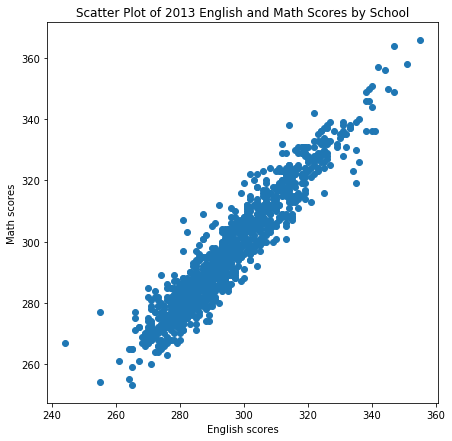

In [27]:
#2013
pl.figure(figsize=(7,7))
pl.scatter(engall2013["mean"], mathall2013["mean"])
pl.title("Scatter Plot of 2013 English and Math Scores by School")
pl.ylabel("Math scores")
pl.xlabel("English scores")

Text(0.5,0,'English scores')

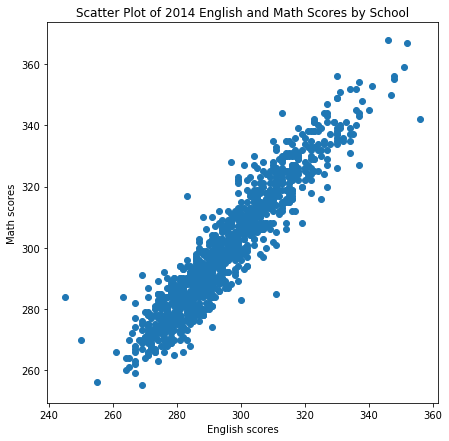

In [28]:
#2014
pl.figure(figsize=(7,7))
pl.scatter(engall2014["mean"], mathall2014["mean"])
pl.title("Scatter Plot of 2014 English and Math Scores by School")
pl.ylabel("Math scores")
pl.xlabel("English scores")

In [29]:
#to visualize 2015, we must first merge the English and Math dataframes to account
#for the fact that the Math dataframe has an additional observation
graph2015 = pd.merge(engall2015, mathall2015, on = "DBN")



Text(0.5,0,'English scores')

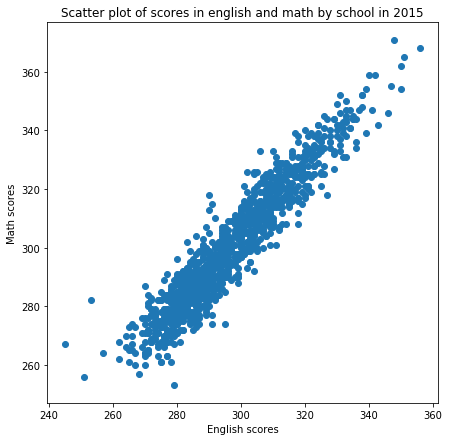

In [30]:
#2015
pl.figure(figsize=(7,7))
pl.scatter(graph2015["English Mean Score"], graph2015["Math Mean Score"])
pl.title("Scatter plot of scores in english and math by school in 2015")
pl.ylabel("Math scores")
pl.xlabel("English scores")

In [31]:
#now load in census tract data as a geo dataframe to merge with the school data
ct = gp.GeoDataFrame.from_file("geo_export_4673b176-b455-4c30-85ec-1abd11272012.shp")

In [32]:
ct.head()

,puma,boro_ct201,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
0,3903,5000900,000900,West New Brighton-New Brighton-St. George,SI22,Staten Island,7729.016794,2.497010e+06,I,5,9,POLYGON ((-74.07920577013245 40.64343078374567...
1,3808,1009800,009800,Turtle Bay-East Midtown,MN19,Manhattan,5534.199811,1.906016e+06,I,1,98,POLYGON ((-73.96432543478758 40.75638153099091...
2,3808,1010000,010000,Turtle Bay-East Midtown,MN19,Manhattan,5692.168737,1.860938e+06,I,1,100,POLYGON ((-73.96802436915851 40.75957814005282...
3,3807,1010200,010200,Midtown-Midtown South,MN17,Manhattan,5687.802439,1.860993e+06,I,1,102,POLYGON ((-73.97124277307127 40.76093641847906...
4,3807,1010400,010400,Midtown-Midtown South,MN17,Manhattan,5693.036367,1.864600e+06,I,1,104,POLYGON ((-73.97445730550224 40.76229308352487...


In [33]:
ct.columns

Index(['puma', 'boro_ct201', 'ct2010', 'ntaname', 'ntacode', 'boro_name',
       'shape_leng', 'shape_area', 'cdeligibil', 'boro_code', 'ctlabel',
       'geometry'],
      dtype='object')

In [34]:
#before merging the census information with the schools data
#we must create a borough census tract variable in the schools dataframes
engall2013["Borough_Code"] = engall2013["LOCATION_CODE"].str[0]
engall2014["Borough_Code"] = engall2014["LOCATION_CODE"].str[0]
engall2015["Borough_Code"] = engall2015["LOCATION_CODE"].str[0]

mathall2013["Borough_Code"] = mathall2013["LOCATION_CODE"].str[0]
mathall2014["Borough_Code"] = mathall2014["LOCATION_CODE"].str[0]
mathall2015["Borough_Code"] = mathall2015["LOCATION_CODE"].str[0]

/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [35]:
#assign each borough code letter a number matching the value in the census tract data
#i.e. 1=Manhattan, 2=Bronx, etc.
def b_num(letter): 
    if letter == "K":
        return "3"
    elif letter == "X":
        return "2"
    elif letter == "Q":
        return "4"
    elif letter == "M":
        return "1"
    elif letter == "R":
        return "5"
engall2013["Borough_Code"].apply(b_num)
engall2014["Borough_Code"].apply(b_num)
engall2015["Borough_Code"].apply(b_num)

mathall2013["Borough_Code"].apply(b_num)
mathall2014["Borough_Code"].apply(b_num)
mathall2015["Borough_Code"].apply(b_num)

0        1
11       1
23       1
35       1
47       1
59       1
71       1
83       1
95       1
107      1
119      1
131      1
143      1
155      1
167      1
179      1
189      1
201      1
213      1
225      1
236      1
248      1
260      1
272      1
283      1
295      1
306      1
318      1
330      1
342      1
        ..
12785    5
12797    5
12809    5
12821    5
12833    5
12845    5
12857    5
12869    5
12881    5
12893    5
12905    3
12917    3
12929    3
12941    3
12953    3
12964    3
12976    3
12988    3
12999    3
13011    3
13023    3
13035    3
13046    3
13058    3
13069    3
13080    3
13092    3
13104    3
13116    3
13127    3
Name: Borough_Code, Length: 1125, dtype: object

In [36]:
#convert borough codes to borough numbers
engall2013["Borough_Num"] = engall2013["Borough_Code"].apply(b_num)
engall2014["Borough_Num"] = engall2014["Borough_Code"].apply(b_num)
engall2015["Borough_Num"] = engall2015["Borough_Code"].apply(b_num)

mathall2013["Borough_Num"] = mathall2013["Borough_Code"].apply(b_num)
mathall2014["Borough_Num"] = mathall2014["Borough_Code"].apply(b_num)
mathall2015["Borough_Num"] = mathall2015["Borough_Code"].apply(b_num)

/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [37]:
#add leading zeros to santardize length of the census tract variables
engall2013["CENSUS_TRACT"] = engall2013['CENSUS_TRACT'].apply(lambda x: '{0:0>6}'.format(x)).astype(str)
engall2014["CENSUS_TRACT"] = engall2014['CENSUS_TRACT'].apply(lambda x: '{0:0>6}'.format(x)).astype(str)
engall2015["CENSUS_TRACT"] = engall2015['CENSUS_TRACT'].apply(lambda x: '{0:0>6}'.format(x)).astype(str)

mathall2013["CENSUS_TRACT"] = mathall2013['CENSUS_TRACT'].apply(lambda x: '{0:0>6}'.format(x)).astype(str)
mathall2014["CENSUS_TRACT"] = mathall2014['CENSUS_TRACT'].apply(lambda x: '{0:0>6}'.format(x)).astype(str)
mathall2015["CENSUS_TRACT"] = mathall2015['CENSUS_TRACT'].apply(lambda x: '{0:0>6}'.format(x)).astype(str)

/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [38]:
#now create the borough census tract variable
#create BoroCT2010
engall2013["BoroCT2010"] = engall2013["Borough_Num"] + engall2013["CENSUS_TRACT"]
engall2014["BoroCT2010"] = engall2014["Borough_Num"] + engall2014["CENSUS_TRACT"]
engall2015["BoroCT2010"] = engall2015["Borough_Num"] + engall2015["CENSUS_TRACT"]

mathall2013["BoroCT2010"] = mathall2013["Borough_Num"] + mathall2013["CENSUS_TRACT"]
mathall2014["BoroCT2010"] = mathall2014["Borough_Num"] + mathall2014["CENSUS_TRACT"]
mathall2015["BoroCT2010"] = mathall2015["Borough_Num"] + mathall2015["CENSUS_TRACT"]

/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/zachbookpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [40]:
#now merge with census tract data
engall2013 = pd.merge(ct, engall2013, left_on = "boro_ct201",right_on="BoroCT2010", how = "inner")
engall2014 = pd.merge(ct, engall2014, left_on = "boro_ct201",right_on="BoroCT2010", how = "inner")
engall2015 = pd.merge(ct, engall2015, left_on = "boro_ct201",right_on="BoroCT2010", how = "inner")

mathall2013 = pd.merge(ct, mathall2013, left_on = "boro_ct201", right_on="BoroCT2010", how = "inner")
mathall2014 = pd.merge(ct, mathall2014, left_on = "boro_ct201", right_on="BoroCT2010", how = "inner")
mathall2015 = pd.merge(ct, mathall2015, left_on = "boro_ct201",right_on="BoroCT2010", how = "inner")

In [41]:
print(engall2013.shape)
print(engall2014.shape)
print(engall2015.shape)

print(mathall2013.shape)
print(mathall2014.shape)
print(mathall2015.shape)

(1086, 73)
(1115, 73)
(1124, 73)
(1086, 73)
(1115, 73)
(1125, 73)


In [42]:
engall2013.columns

Index(['puma', 'boro_ct201', 'ct2010', 'ntaname', 'ntacode', 'boro_name',
       'shape_leng', 'shape_area', 'cdeligibil', 'boro_code', 'ctlabel',
       'geometry', 'FISCAL_YEAR', 'ATS SYSTEM CODE', 'LOCATION_CODE',
       'LOCATION_NAME', 'BEDS NUMBER', 'MANAGED_BY_NAME',
       'LOCATION_TYPE_DESCRIPTION', 'LOCATION_CATEGORY_DESCRIPTION',
       'GRADES_TEXT', 'GRADES_FINAL_TEXT', 'OPEN_DATE', 'STATUS_DESCRIPTIONS',
       'PRIMARY_BUILDING_CODE', 'PRIMARY_ADDRESS_LINE_1', 'STATE_CODE',
       'X_COORDINATE', 'Y_COORDINATE', 'COMMUNITY_DISTRICT',
       'COUNCIL_DISTRICT', 'CENSUS_TRACT', 'BOROUGH_BLOCK_LOT', 'NTA',
       'NTA_NAME', 'PRINCIPAL_NAME', 'PRINCIPAL_TITLE',
       'PRINCIPAL_PHONE_NUMBER', 'FAX_NUMBER', 'GEOGRAPHICAL_DISTRICT_CODE',
       'ADMIN_DISTRICT_LOCATION_CODE', 'ADMINISTRATIVE_DISTRICT_NAME',
       'COMMUNITY_SCHOOL_SUP_NAME', 'FIELD_SUPPORT_CENTER_NAME',
       'FIELD_SUPPORT_CENTER_LEADER_NAME', 'SCHOOL_SUPPORT_TEAM_NAME',
       'SCHOOL_SUPPORT_TEAM_LEADE

In [43]:
#rename mean score column in each df
engall2013.rename(columns={"Mean Scale Score":"Eng2013_Mean"}, inplace=True)
engall2014.rename(columns={"Mean Scale Score":"Eng2014_Mean"}, inplace=True)
engall2015.rename(columns={"Mean Scale Score":"Eng2015_Mean"}, inplace=True)

mathall2013.rename(columns={"Mean Scale Score":"Math2013_Mean"}, inplace=True)
mathall2014.rename(columns={"Mean Scale Score":"Math2014_Mean"}, inplace=True)
mathall2015.rename(columns={"Mean Scale Score":"Math2015_Mean"}, inplace=True)

In [44]:
#now combine enligsh and math scores in each year
scores2013 = pd.merge(engall2013,mathall2013[['ATS SYSTEM CODE','Math2013_Mean']],on='ATS SYSTEM CODE', how='left')
scores2014 = pd.merge(engall2014,mathall2014[['ATS SYSTEM CODE','Math2014_Mean']],on='ATS SYSTEM CODE', how='left')
scores2015 = pd.merge(engall2015,mathall2015[['ATS SYSTEM CODE','Math2015_Mean']],on='ATS SYSTEM CODE', how='left')

In [45]:
print(scores2013.shape)
print(scores2014.shape)
print(scores2015.shape)

(1086, 74)
(1115, 74)
(1124, 74)


In [48]:
#shorten dataframes to include only columns of interest
scores2013_short = scores2013[["geometry", "boro_ct201", "LOCATION_NAME", "LOCATION_TYPE_DESCRIPTION",
                              "LOCATION_CATEGORY_DESCRIPTION", "X_COORDINATE", "Y_COORDINATE", "BOROUGH_BLOCK_LOT",
                              "DBN", "Number Tested", "Eng2013_Mean", "Math2013_Mean"]]

scores2014_short = scores2014[["geometry", "boro_ct201", "LOCATION_NAME", "LOCATION_TYPE_DESCRIPTION",
                              "LOCATION_CATEGORY_DESCRIPTION", "X_COORDINATE", "Y_COORDINATE", "BOROUGH_BLOCK_LOT",
                              "DBN", "Number Tested", "Eng2014_Mean", "Math2014_Mean"]]

scores2015_short = scores2015[["geometry", "boro_ct201", "LOCATION_NAME", "LOCATION_TYPE_DESCRIPTION",
                              "LOCATION_CATEGORY_DESCRIPTION", "X_COORDINATE", "Y_COORDINATE", "BOROUGH_BLOCK_LOT",
                              "DBN", "Number Tested", "Eng2015_Mean", "Math2015_Mean"]]

In [49]:
print(scores2013_short.shape)
print(scores2014_short.shape)
print(scores2015_short.shape)

(1086, 12)
(1115, 12)
(1124, 12)


In [50]:
scores2013_short.head()

,geometry,boro_ct201,LOCATION_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,X_COORDINATE,Y_COORDINATE,BOROUGH_BLOCK_LOT,DBN,Number Tested,Eng2013_Mean,Math2013_Mean
0,POLYGON ((-74.07920577013245 40.64343078374567...,5000900,P.S. 031 William T. Davis,General Academic,Elementary,960544.0,173219.0,5000490182,31R031,230,279,281
1,POLYGON ((-73.94505127984516 40.80259859871748...,1019000,P.S. 149 Sojourner Truth,General Academic,K-8,998622.0,231708.0,1016010001,03M149,185,276,272
2,POLYGON ((-73.93580780201182 40.80949763825763...,1020600,P.S. 133 Fred R Moore,General Academic,Elementary,1001087.0,234266.0,1017550001,05M133,120,279,275
3,POLYGON ((-73.93580780201182 40.80949763825763...,1020600,Choir Academy of Harlem,General Academic,Secondary School,1001216.0,233302.0,1017520022,05M469,140,265,265
4,POLYGON ((-73.93669078722112 40.83719324953258...,1024900,P.S. 008 Luis Belliard,General Academic,Elementary,1001789.0,245040.0,1021120001,06M008,272,284,287


In [52]:
#convert dataframes into geo dataframes for mapping
geoscores2013_short = gp.GeoDataFrame(scores2013_short)
geoscores2014_short = gp.GeoDataFrame(scores2014_short)
geoscores2015_short = gp.GeoDataFrame(scores2015_short)

### Visualizing the Test Score Data by Census Tract

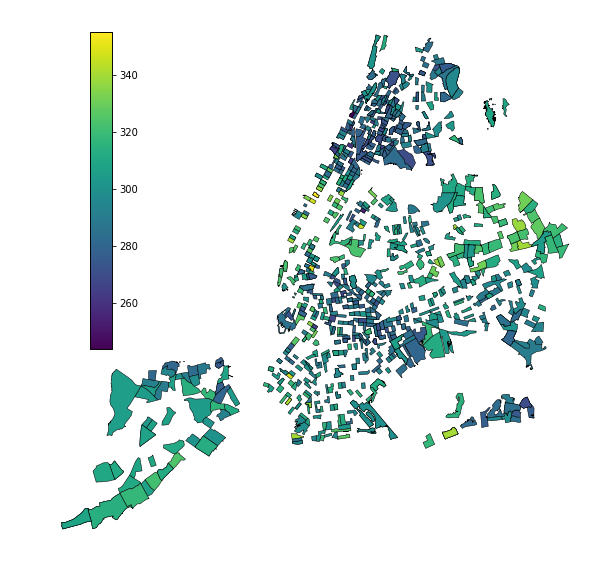

In [53]:
#2013 Mean English Scores
cp.choroplethNYC(geoscores2013_short, column="Eng2013_Mean", color="k",cmap="viridis", edgecolor="k", lw=0.5);

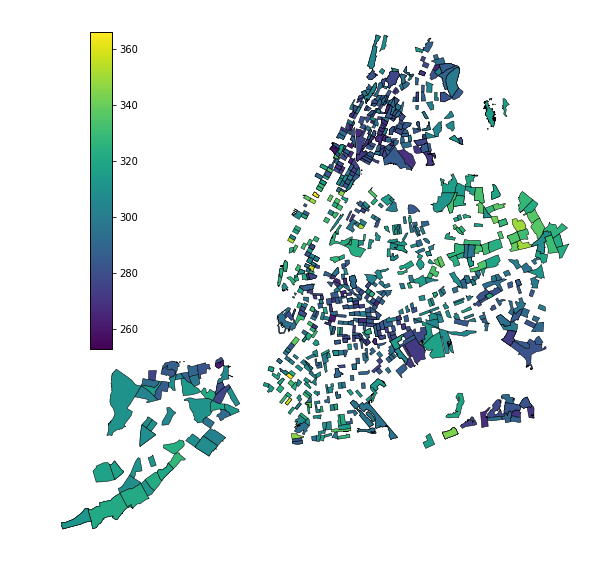

In [57]:
#2013 Mean Math Scores
cp.choroplethNYC(geoscores2013_short, column="Math2013_Mean", color="k",cmap="viridis", edgecolor="k", lw=0.5);

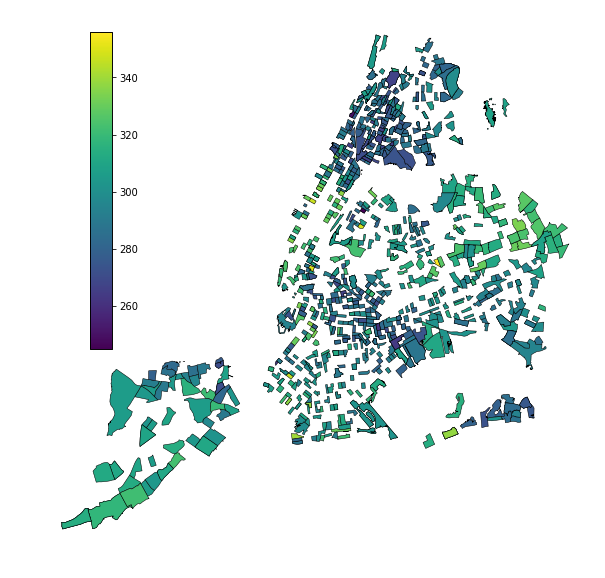

In [55]:
#2014 Mean English Scores
cp.choroplethNYC(geoscores2014_short, column="Eng2014_Mean", color="k",cmap="viridis", edgecolor="k", lw=0.5);

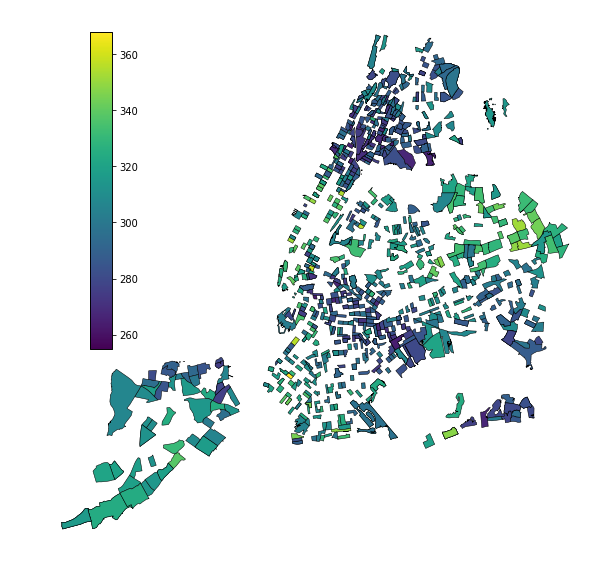

In [58]:
#2014 Mean Math Scores
cp.choroplethNYC(geoscores2014_short, column="Math2014_Mean", color="k",cmap="viridis", edgecolor="k", lw=0.5);

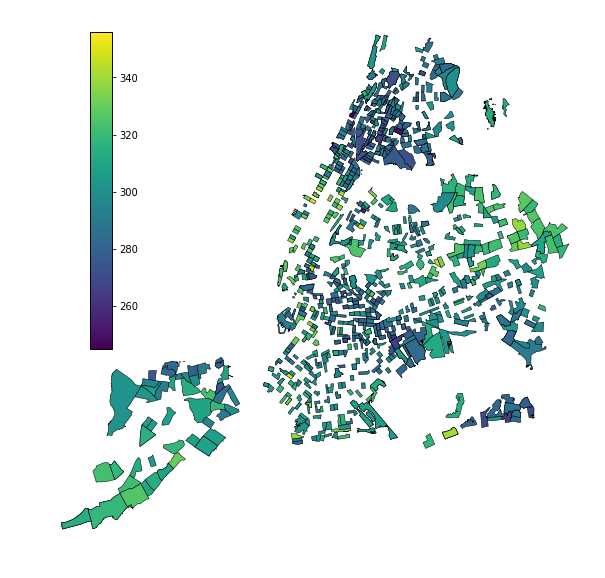

In [56]:
#2015 Mean English Scores
cp.choroplethNYC(geoscores2015_short, column="Eng2015_Mean", color="k",cmap="viridis", edgecolor="k", lw=0.5);

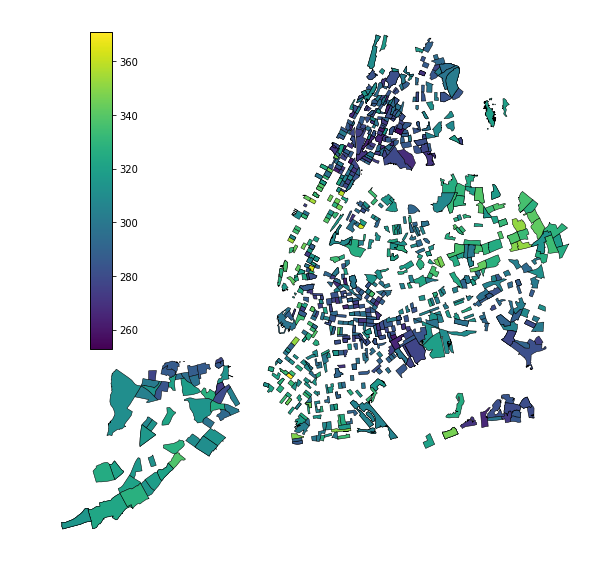

In [59]:
#2015 Mean Math Scores
cp.choroplethNYC(geoscores2015_short, column="Math2015_Mean", color="k",cmap="viridis", edgecolor="k", lw=0.5);